In [18]:
import gym
import numpy as np
import random
# env = gym.make('FrozenLake-v0')
env =gym.make('FrozenLake8x8-v0')
# Q = np.random.rand(env.observation_space.n,env.action_space.n)
Q = np.ones((env.observation_space.n,env.action_space.n))
#function to test the average rewards over n runs after training 
def test():
    sum=0
    for i in range(50):
        s = env.reset()
        done = False
        j = 0
        while not done:
            j+=1
            a =np.argmax(Q[s])
            s1,r,done,_ = env.step(a)
            sum+=r
            s=s1
    return sum
epsilon=0.1
#choose action e-greedy policy
def choose_action(state):
    action=0
    e=random.random()
    if e<epsilon:
        return random.choice(range(env.action_space.n))
    else:
        return np.argmax(Q[state, :])
#learning rate
l = 0.6
gamma = 0.9
#number of episodes
num_episodes = 10000
rewards=[]
for i in range(num_episodes):
    #reset environment after each episode
    s = env.reset()
    j=1
    #choose an action
    a = choose_action(s)
    done = False
    j=0
    sum=0
    #while episode is not converged
    while not done:
        j+=1
        #do the action and get next state
        s1,r,done,_ = env.step(a)
        sum+=r
        #again choose an action for next state
        a1=choose_action(s1)
        #update Q-values based 0n sarsa equation
        if not done:
            Q[s][a]= Q[s][a]+l*(r+gamma* Q[s1][a1]-Q[s][a])
        if done:
            Q[s][a]= Q[s][a]+l*(r-Q[s][a])
        s=s1
        a=a1
    rewards.append(test())
print ("Final Q-Table Values")
print ("left          down          right          up")
print (Q)


Final Q-Table Values
left          down          right          up
[[2.23339123e-04 2.15363801e-04 2.30414458e-04 5.30022181e-04]
 [3.48320066e-04 3.01024012e-04 6.38459058e-04 3.20318821e-04]
 [4.31193617e-04 4.26906657e-04 3.55185695e-04 4.57304091e-04]
 [3.09878820e-04 6.75208204e-04 4.16933474e-04 1.40608060e-03]
 [1.55065587e-03 1.41518237e-03 3.83168597e-03 1.64238959e-03]
 [2.48352571e-03 3.51352092e-03 3.92305825e-03 4.73149851e-03]
 [6.19518577e-03 4.37037088e-03 6.96479397e-03 3.98089730e-03]
 [9.65836359e-03 6.09926914e-03 7.25157134e-03 4.73700322e-03]
 [2.16891615e-04 1.96630575e-04 1.96784002e-04 2.24828464e-04]
 [2.12065317e-04 2.13001359e-04 2.48823846e-04 2.62638196e-04]
 [2.21935202e-04 1.87769460e-04 2.49363000e-04 2.24349806e-04]
 [1.79961329e-04 2.07583729e-04 1.26066871e-05 4.45802327e-04]
 [9.09544780e-04 1.45085808e-03 1.06546681e-03 1.24587474e-03]
 [2.28771375e-03 5.69538531e-03 2.31886742e-03 3.14645479e-03]
 [6.14290080e-03 1.40339904e-02 5.15519560e-03 6.19

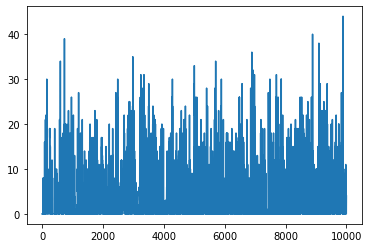

In [17]:
import matplotlib.pyplot as plt
episodes=[]
for i in range(num_episodes):
    episodes.append(i)
plt.plot(episodes,rewards)